In [1]:
import torch
import numpy as np
import pandas as pd
from datasets.base_dataset import BaseDataset
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Dataset, DataLoader
import sys
sys.path.append("..")
from utils import to_numeric
import pickle

In [2]:
torch.__version__

'1.7.1'

In [3]:
# ============================== Training==========================================

class ADULT(BaseDataset):

    def __init__(self, name='ADULT', single_bit_binary=False, device='cpu', random_state=42, name_state="AL"):
        super(ADULT, self).__init__(name=name, device=device, random_state=random_state)
        print(name_state)
        self.features = {
            'AGEP': None,
            'COW': None,
            'SCHL': None,
            'MAR': None,
            'OCCP': None,
            'POBP': None,
            'RELP': None,
            'WKHP': None,
            'SEX': None,
            'RAC1P': None,      
            'PINCP': ['>50K', '<=50K']
        }
        
        self.single_bit_binary = single_bit_binary
        self.label = 'PINCP'

        self.train_features = {key: self.features[key] for key in self.features.keys() if key != self.label}

        # name_state="GA"

        self.train_data_df = pd.read_csv(f'50_clients_data/raw_data/{name_state}.data', delimiter=',', names=list(self.features.keys()), engine='python')
        self.test_data_df = pd.read_csv(f'50_clients_data/raw_data/{name_state}.test', delimiter=',', names=list(self.features.keys()), skiprows=1, engine='python')

        train_data = self.train_data_df.to_numpy()
        test_data = self.test_data_df.to_numpy()

        train_rows_to_keep = [not ('?' in row) for row in train_data]
        test_rows_to_keep = [not ('?' in row) for row in test_data]

        train_data = train_data[train_rows_to_keep]
        test_data = test_data[test_rows_to_keep]

        # remove the annoying dot from the test labels
        for row in test_data:
            # print(len(row))
            # print(row[-1])

            row[-1] = row[-1][:-1]

        # convert to numeric features
        train_data_num = to_numeric(train_data, self.features, label=self.label, single_bit_binary=self.single_bit_binary)
        test_data_num = to_numeric(test_data, self.features, label=self.label, single_bit_binary=self.single_bit_binary)

        # split features and labels
        Xtrain, Xtest = train_data_num[:, :-1].astype(np.float32), test_data_num[:, :-1].astype(np.float32)
        ytrain, ytest = train_data_num[:, -1].astype(np.float32), test_data_num[:, -1].astype(np.float32)

        print(name_state,len(Xtrain))
        print("ytrain ",np.unique(ytrain))
        print("ytest ",np.unique(ytest))
        
        self.num_features = Xtrain.shape[1]

        # transfer to torch
        self.Xtrain, self.Xtest = torch.tensor(Xtrain).to(self.device), torch.tensor(Xtest).to(self.device)
        self.ytrain, self.ytest = torch.tensor(ytrain, dtype=torch.long).to(self.device), torch.tensor(ytest, dtype=torch.long).to(self.device)

        # set to train mode as base
        self.train()

        # calculate the standardization statistics
        self._calculate_mean_std()

        # calculate the histograms and feature bounds
        self._calculate_categorical_feature_distributions_and_continuous_bounds()

# # pytorch 1.7.1
- 1 setup for Training data (2018) 50_clients_data
- 2 setup for Testing data (2019) 50_clients_data

In [4]:
# NY is removed.. We need make dataloader with Torch2.0

state_codes = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
               "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
               "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
               "NM", "NC", "ND","NY", "OH", "OK", "OR", "PA", "RI", "SC",
               "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# state_codes = [ "CA","FL","GA","IL","OH","PA","TX"]

In [5]:
 # ================ Trainng ===============================

for state_code in state_codes:
    state_name=state_code
    adult_dataset = ADULT(name_state=state_name)
    adult_dataset.standardize()
    dataset = TensorDataset(adult_dataset.Xtrain, adult_dataset.ytrain)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

    with open(f'50_clients_data/processed_data/{state_name}.pkl', 'wb') as f:
        pickle.dump(dataloader, f)
        
    dataset = TensorDataset(adult_dataset.Xtest, adult_dataset.ytest)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  
    
    with open(f'50_clients_data/processed_data/{state_name}_test.pkl', 'wb') as f:
        pickle.dump(dataloader, f)

AL
AL 2000
ytrain  [0. 1.]
ytest  [0. 1.]
AK
AK 2000
ytrain  [0. 1.]
ytest  [0. 1.]
AZ
AZ 2000
ytrain  [0. 1.]
ytest  [0. 1.]
AR
AR 2000
ytrain  [0. 1.]
ytest  [0. 1.]
CA
CA 2000
ytrain  [0. 1.]
ytest  [0. 1.]
CO
CO 2000
ytrain  [0. 1.]
ytest  [0. 1.]
CT
CT 2000
ytrain  [0. 1.]
ytest  [0. 1.]
DE
DE 2000
ytrain  [0. 1.]
ytest  [0. 1.]
FL
FL 2000
ytrain  [0. 1.]
ytest  [0. 1.]
GA
GA 2000
ytrain  [0. 1.]
ytest  [0. 1.]
HI
HI 2000
ytrain  [0. 1.]
ytest  [0. 1.]
ID
ID 2000
ytrain  [0. 1.]
ytest  [0. 1.]
IL
IL 2000
ytrain  [0. 1.]
ytest  [0. 1.]
IN
IN 2000
ytrain  [0. 1.]
ytest  [0. 1.]
IA
IA 2000
ytrain  [0. 1.]
ytest  [0. 1.]
KS
KS 2000
ytrain  [0. 1.]
ytest  [0. 1.]
KY
KY 2000
ytrain  [0. 1.]
ytest  [0. 1.]
LA
LA 2000
ytrain  [0. 1.]
ytest  [0. 1.]
ME
ME 2000
ytrain  [0. 1.]
ytest  [0. 1.]
MD
MD 2000
ytrain  [0. 1.]
ytest  [0. 1.]
MA
MA 2000
ytrain  [0. 1.]
ytest  [0. 1.]
MI
MI 2000
ytrain  [0. 1.]
ytest  [0. 1.]
MN
MN 2000
ytrain  [0. 1.]
ytest  [0. 1.]
MS
MS 2000
ytrain  [0. 1.]
ytest  

In [7]:
adult_dataset.train_data_df[60:]

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
60,68.0,1.0,20.0,3.0,3646.0,30.0,0.0,40.0,2.0,1.0,<=50K
61,44.0,2.0,16.0,1.0,1050.0,12.0,1.0,40.0,2.0,1.0,<=50K
62,21.0,1.0,16.0,5.0,6050.0,13.0,12.0,50.0,1.0,1.0,<=50K
63,44.0,1.0,20.0,1.0,1105.0,56.0,1.0,40.0,1.0,1.0,>50K
64,46.0,1.0,22.0,1.0,1305.0,56.0,1.0,40.0,1.0,1.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
1995,40.0,4.0,23.0,5.0,2205.0,17.0,0.0,50.0,1.0,1.0,<=50K
1996,43.0,1.0,16.0,3.0,4040.0,56.0,13.0,35.0,2.0,1.0,<=50K
1997,25.0,1.0,16.0,5.0,4700.0,17.0,12.0,40.0,2.0,1.0,<=50K
1998,54.0,7.0,19.0,1.0,9130.0,8.0,0.0,40.0,1.0,1.0,>50K


In [8]:
# adult_dataset.train_data_df[adult_dataset.train_data_df["RAC1P"]==2]

In [9]:
adult_dataset.Xtrain[60:]

tensor([[ 1.4702, -0.6885,  0.5057,  ...,  0.0185,  1.0724, -0.0758],
        [-0.0493, -0.1689, -0.9514,  ...,  0.0185,  1.0724, -0.0758],
        [-1.5056, -0.6885, -0.9514,  ...,  0.7208, -0.9320, -0.0758],
        ...,
        [-1.2523, -0.6885, -0.9514,  ...,  0.0185,  1.0724, -0.0758],
        [ 0.5838,  2.4296,  0.1414,  ...,  0.0185, -0.9320, -0.0758],
        [-1.4423, -0.6885,  0.5057,  ...,  2.4063, -0.9320, -0.0758]])

In [ ]:
 # -----------------  Needed for Intersectional loss ----------

# -0.9311,==>1
# 1.0734,==>2 or 0

# -0.0758,==>1  
# 13.1846,==>2  or 0

# Torch 2+ 

In [23]:
torch.__version__

'1.7.1'

In [4]:
# ============================== Testing ==========================================

class ADULT(BaseDataset):

    def __init__(self, name='ADULT', single_bit_binary=False, device='cpu', random_state=42, name_state="AL"):
        super(ADULT, self).__init__(name=name, device=device, random_state=random_state)
        print(name_state)
        self.features = {
            'AGEP': None,
            'COW': None,
            'SCHL': None,
            'MAR': None,
            'OCCP': None,
            'POBP': None,
            'RELP': None,
            'WKHP': None,
            'SEX': None,
            'RAC1P': None,      
            'PINCP': ['>50K', '<=50K']
        }
        
        self.single_bit_binary = single_bit_binary
        self.label = 'PINCP'

        self.train_features = {key: self.features[key] for key in self.features.keys() if key != self.label}

        # name_state="GA"

        
        self.train_data_df = pd.read_csv(f'50_clients_data_testing/client_subG_splits/{name_state}.data', delimiter=',', names=list(self.features.keys()), engine='python')
        self.test_data_df = pd.read_csv(f'50_clients_data_testing/client_subG_splits/{name_state}.test', delimiter=',', names=list(self.features.keys()), skiprows=1, engine='python')

        train_data = self.train_data_df.to_numpy()
        test_data = self.test_data_df.to_numpy()

        train_rows_to_keep = [not ('?' in row) for row in train_data]
        test_rows_to_keep = [not ('?' in row) for row in test_data]

        train_data = train_data[train_rows_to_keep]
        test_data = test_data[test_rows_to_keep]

        # remove the annoying dot from the test labels
        for row in test_data:
            # print(len(row))
            # print(row[-1])

            row[-1] = row[-1][:-1]

        # convert to numeric features
        train_data_num = to_numeric(train_data, self.features, label=self.label, single_bit_binary=self.single_bit_binary)
        test_data_num = to_numeric(test_data, self.features, label=self.label, single_bit_binary=self.single_bit_binary)

        # split features and labels
        Xtrain, Xtest = train_data_num[:, :-1].astype(np.float32), test_data_num[:, :-1].astype(np.float32)
        ytrain, ytest = train_data_num[:, -1].astype(np.float32), test_data_num[:, -1].astype(np.float32)

        print(name_state,len(Xtrain))
        print("ytrain ",np.unique(ytrain))
        print("ytest ",np.unique(ytest))
        
        self.num_features = Xtrain.shape[1]

        # transfer to torch
        self.Xtrain, self.Xtest = torch.tensor(Xtrain).to(self.device), torch.tensor(Xtest).to(self.device)
        self.ytrain, self.ytest = torch.tensor(ytrain, dtype=torch.long).to(self.device), torch.tensor(ytest, dtype=torch.long).to(self.device)

        # set to train mode as base
        self.train()

        # calculate the standardization statistics
        self._calculate_mean_std()

        # calculate the histograms and feature bounds
        self._calculate_categorical_feature_distributions_and_continuous_bounds()

In [6]:
# adult_dataset.train_data_df

In [7]:
# adult_dataset.Xtrain

In [8]:
# adult_dataset.ytrain

In [9]:
#============================ For testing =============================
state_codes=["male","female","white","black"]

for state_code in state_codes:
    state_name=state_code
    adult_dataset = ADULT(name_state=state_name)
    adult_dataset.standardize()
    dataset = TensorDataset(adult_dataset.Xtrain, adult_dataset.ytrain)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

    with open(f'50_clients_data_testing/client_subG_processed/{state_name}.pkl', 'wb') as f:
        pickle.dump(dataloader, f)
        
    dataset = TensorDataset(adult_dataset.Xtest, adult_dataset.ytest)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  
    
    with open(f'50_clients_data_testing/client_subG_processed/{state_name}_test.pkl', 'wb') as f:
        pickle.dump(dataloader, f)

male
male 86936
ytrain  [0. 1.]
ytest  [0.]
female
female 79835
ytrain  [0. 1.]
ytest  [0.]
white
white 130463
ytrain  [0. 1.]
ytest  [0.]
black
black 14480
ytrain  [0. 1.]
ytest  [0.]


In [25]:
#============================ For testing =============================
state_codes=["WM","WW","BM","BW"]

for state_code in state_codes:
    state_name=state_code
    adult_dataset = ADULT(name_state=state_name)
    adult_dataset.standardize()
    dataset = TensorDataset(adult_dataset.Xtrain, adult_dataset.ytrain)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

    with open(f'50_clients_data_testing/client_subG_processed/{state_name}.pkl', 'wb') as f:
        pickle.dump(dataloader, f)
        
    dataset = TensorDataset(adult_dataset.Xtest, adult_dataset.ytest)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  
    
    with open(f'50_clients_data_testing/client_subG_processed/{state_name}_test.pkl', 'wb') as f:
        pickle.dump(dataloader, f)

WM
WM 68843
ytrain  [0. 1.]
ytest  [0.]
WW
WW 61620
ytrain  [0. 1.]
ytest  [0.]
BM
BM 6750
ytrain  [0. 1.]
ytest  [0.]
BW
BW 7730
ytrain  [0. 1.]
ytest  [0.]


tensor([1, 0, 1,  ..., 1, 0, 0])

# pytorch 2.3 Loader -- SubGroup Processed

In [25]:
adult_dataset.standardize()
adult_dataset.Xtest

tensor([[ 0.8240,  0.4534, -0.1193,  ...,  0.1639,  1.0577, -0.7109],
        [-1.5274, -0.6060, -0.6266,  ..., -0.6042,  1.0577, -0.7109],
        [-0.7884, -0.6060,  0.6416,  ...,  0.1639,  1.0577, -0.7109],
        ...,
        [ 0.2194, -0.0763, -0.6266,  ..., -2.2941,  1.0577,  1.0041],
        [ 0.5553,  2.0425, -0.6266,  ...,  0.1639,  1.0577,  1.6900],
        [-1.2587, -0.6060, -0.6266,  ...,  0.1639,  1.0577, -0.7109]])

In [6]:
adult_dataset.ytrain

tensor([1, 0, 1,  ..., 0, 0, 1])

In [29]:
adult_dataset.Xtest[1]

tensor([-1.5274, -0.6060, -0.6266,  1.2704,  0.2804, -0.7157, -0.1148, -0.6042,
         1.0577, -0.7109])

In [23]:
adult_dataset.de_standardize()
adult_dataset.Xtest

tensor([[55.,  3., 18.,  ..., 40.,  2.,  1.],
        [20.,  1., 16.,  ..., 30.,  2.,  1.],
        [31.,  1., 21.,  ..., 40.,  2.,  1.],
        ...,
        [46.,  2., 16.,  ...,  8.,  2.,  6.],
        [51.,  6., 16.,  ..., 40.,  2.,  8.],
        [24.,  1., 16.,  ..., 40.,  2.,  1.]])

In [8]:
for state_code in state_codes:
    state_name=state_code
    adult_dataset = ADULT(name_state=state_name)
    adult_dataset.standardize()
    # dataset = TensorDataset(adult_dataset.Xtrain, adult_dataset.ytrain)
    # dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

    # with open(f'50_clients_data/processed_data/{state_name}.pkl', 'wb') as f:
    #     pickle.dump(dataloader, f)
        
    dataset = TensorDataset(adult_dataset.Xtest, adult_dataset.ytest)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  
    
    with open(f'50_clients_data/processed_data/{state_name}_test.pkl', 'wb') as f:
        pickle.dump(dataloader, f)

AL
AL 17814
[0. 1.]
[0. 1.]


In [5]:
state_name="AL"

client_data_dir="50_clients_data/processed_data/"

with open(client_data_dir+f'{state_name}.pkl', 'rb') as f:
    train_data_all_client  = pickle.load(f)

len(train_data_all_client)*32

32

In [6]:
# state_name=state_code
# adult_dataset = ADULT(name_state=state_name)

In [7]:
# adult_dataset.standardize()

In [8]:
# adult_dataset.Xtrain

In [9]:
# dataset = TensorDataset(adult_dataset.Xtrain, adult_dataset.ytrain)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

# with open(f'50_clients_data/processed_data/{sta_name}.pkl', 'wb') as f:
#     pickle.dump(dataloader, f)


# dataset = TensorDataset(adult_dataset.Xtest, adult_dataset.ytest)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  

# with open(f'50_clients_data/processed_data/{sta_name}_test.pkl', 'wb') as f:
#     pickle.dump(dataloader, f)

In [12]:
0.6602031394275162/0.7985865724381626

0.8267145506990579

In [14]:
import pandas as pd

# The input dictionary
data = {
    'AL': {'male': 0.7985865724381626, 'female': 0.6602031394275162, 'white': 0.7411894273127754, 'black': 0.6600688468158348},
    'AK': {'male': 0.7442977190876351, 'female': 0.6165755919854281, 'white': 0.706441393875396, 'black': 0.5927180355630821}
}
results_fixed = {}

# Iterate through each key in the data
for state, values in data.items():
    # male_to_female: ensure male is the numerator
    male_to_female = values['male'] / values['female'] if values['male'] < values['female'] else values['female'] / values['male']
    
    # white_to_black: ensure white is the numerator
    white_to_black = values['white'] / values['black'] if values['white'] < values['black'] else values['black'] / values['white']
    
    # Store the updated results for each state
    results_fixed[state] = {
        'male_to_female': male_to_female,
        'white_to_black': white_to_black
    }

# Convert the results dictionary to a DataFrame
df_extended = pd.DataFrame(results_fixed).T

df_extended

,male_to_female,white_to_black
AL,0.826715,0.890554
AK,0.828399,0.839019


In [16]:
df1 = df_extended.copy()
df2 = df_extended.copy()
df3 = df_extended.copy()
df4 = df_extended.copy()



In [18]:
!pip install matplotlib

  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
  Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 5.1 MB/s eta 0:00:00
Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (301 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 55.3 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.5 MB/s eta 0:00:00


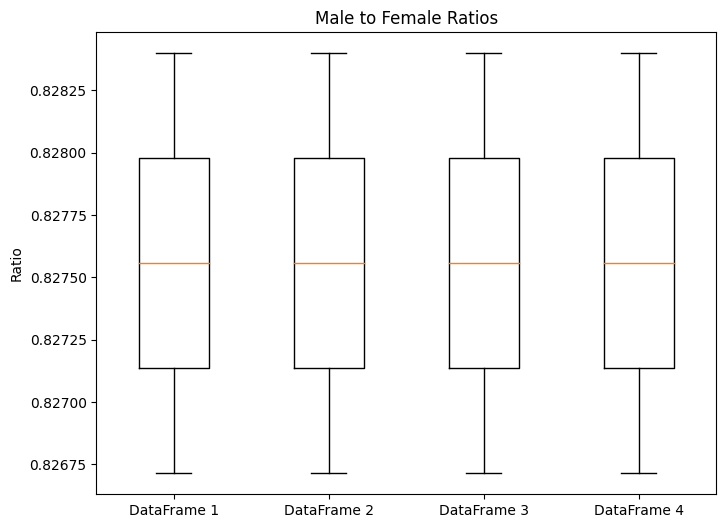

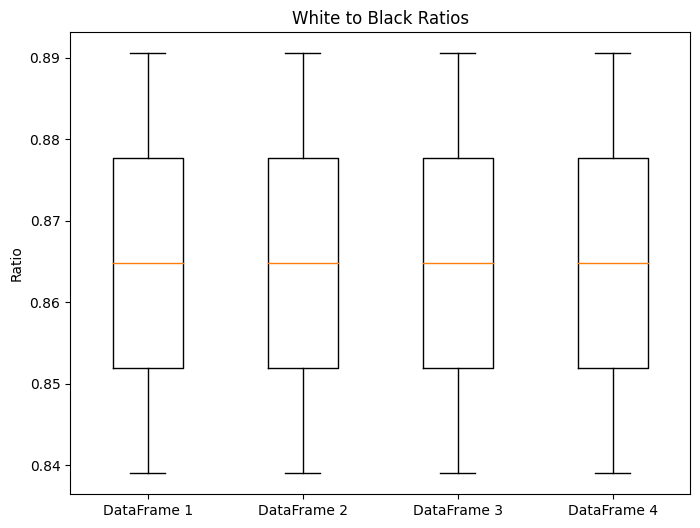

In [20]:
# Create two figures, one for male_to_female and one for white_to_black

# First figure for male_to_female
fig1, ax1 = plt.subplots(figsize=(8, 6))
df_list = [df1['male_to_female'], df2['male_to_female'], df3['male_to_female'], df4['male_to_female']]
ax1.boxplot(df_list, labels=['DataFrame 1', 'DataFrame 2', 'DataFrame 3', 'DataFrame 4'])
ax1.set_title('Male to Female Ratios')
ax1.set_ylabel('Ratio')

# Second figure for white_to_black
fig2, ax2 = plt.subplots(figsize=(8, 6))
df_list = [df1['white_to_black'], df2['white_to_black'], df3['white_to_black'], df4['white_to_black']]
ax2.boxplot(df_list, labels=['DataFrame 1', 'DataFrame 2', 'DataFrame 3', 'DataFrame 4'])
ax2.set_title('White to Black Ratios')
ax2.set_ylabel('Ratio')

# Show both figures
plt.show()
